## Loading Library

In [161]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

%pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [162]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [163]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [164]:
#3 check missing values
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

4. The overview reveals a _________________________. (fill that blank on the section below)

dataset filled with 5 variables with 0 missing values. 

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

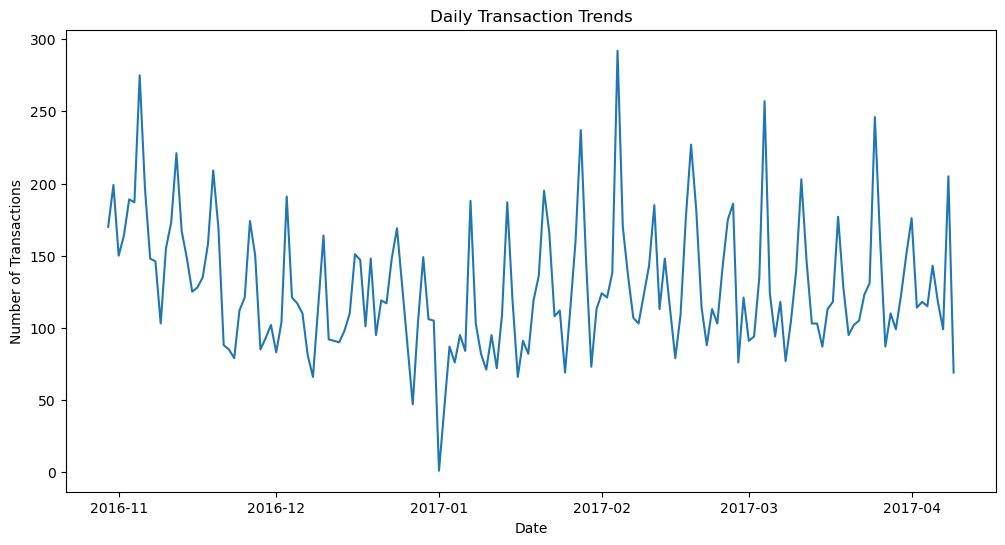

In [165]:
df["date_time"] = pd.to_datetime(df["date_time"], format = "%d-%m-%Y %H:%M")
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['hour'] = pd.to_datetime(df['date_time']).dt.hour

daily_transactions = df.groupby('date')['Transaction'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['date'], daily_transactions['Transaction'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [166]:
# 6

df['date_time'] = pd.to_datetime(df['date_time'])

# Add new columns for different time perspectives
df['hour'] = df['date_time'].dt.hour            # Extract hour
df['time'] = df['date_time'].dt.time            # Extract time (hh:mm:ss)
df['day'] = df['date_time'].dt.day              # Extract day of the month (1-31)
df['day_name'] = df['date_time'].dt.day_name()  # Extract day name (e.g., Monday)
df['month'] = df['date_time'].dt.month          
df['year'] = df['date_time'].dt.year            # Extract year (e.g., 2023)


# Preview the modified dataframe
df.sample(5)


,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,time,day,day_name,month,year
3742,1815,Medialuna,2016-11-21 10:14:00,morning,weekday,2016-11-21,10,10:14:00,21,Monday,11,2016
1994,968,Coffee,2016-11-10 11:46:00,morning,weekday,2016-11-10,11,11:46:00,10,Thursday,11,2016
7079,3568,Bread,2016-12-20 19:34:00,evening,weekday,2016-12-20,19,19:34:00,20,Tuesday,12,2016
14600,7031,Bread,2017-02-22 17:07:00,evening,weekday,2017-02-22,17,17:07:00,22,Wednesday,2,2017
7014,3527,Cake,2016-12-20 11:21:00,morning,weekday,2016-12-20,11,11:21:00,20,Tuesday,12,2016



Alright, now I can easily create a visualization of monthly sales.

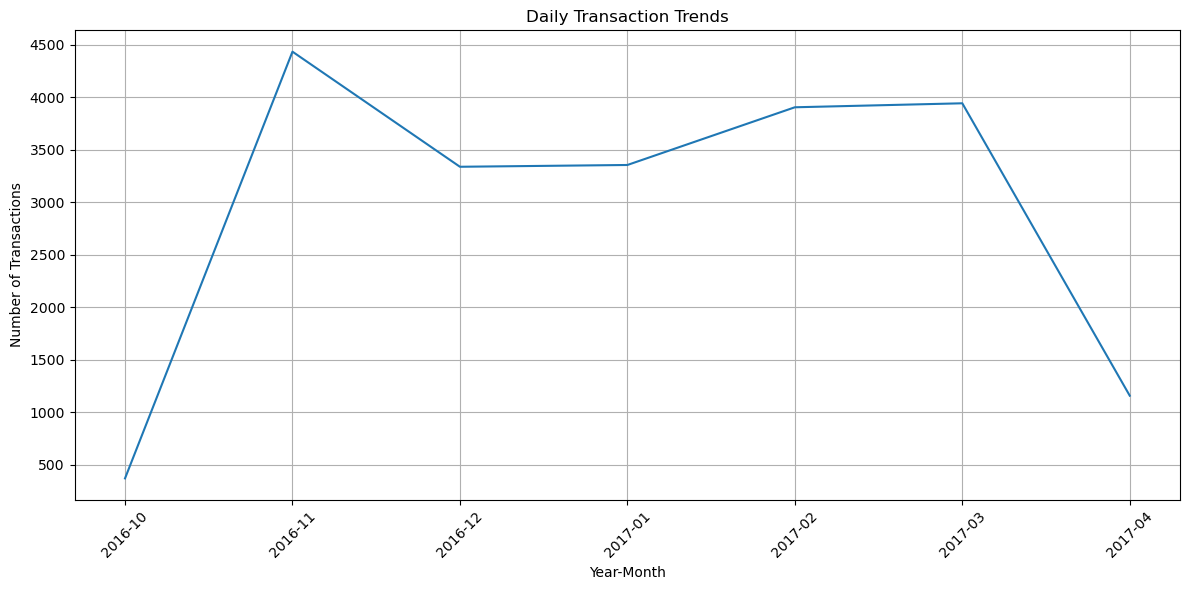

In [167]:

# Ensure that 'date_time' is in datetime format
df["date_time"] = pd.to_datetime(df["date_time"], format="%d-%m-%Y %H:%M")

# Extract date and hour
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour

# Create a 'month_year' column by combining 'month' and 'year'
df['month_year'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# Aggregate daily transactions by 'month_year'
daily_transactions = df.groupby('month_year')['Transaction'].count().reset_index()

# Plotting the monthly transaction trend
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['month_year'], daily_transactions['Transaction'])

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

The 2nd visualization is easier to read as there is wider visualization than the 1st one that shows piled up visualization.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [168]:
# Get unique weekday names (for 'weekday' category)
weekdays = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()

# Get unique weekend names (for 'weekend' category)
weekends = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

# Print the unique values for weekdays and weekends
print("Unique weekday names:", weekdays)
print("Unique weekend names:", weekends)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [169]:
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")
daily_transactions_count = df.groupby(['month', 'day_name']).size().reset_index(name='Transaction_Count')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transactions_count['day_name'] = pd.Categorical(daily_transactions_count['day_name'], categories=day_order, ordered=True)
daily_transactions_count_pivot = daily_transactions_count.pivot(index='month', columns='day_name', values='Transaction_Count')
daily_transactions_count_pivot = daily_transactions_count_pivot.fillna(0)
daily_transactions_count_pivot.head() 

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329.0,474.0,322.0,399.0,489.0,807.0,536.0
2,474.0,429.0,419.0,456.0,599.0,879.0,650.0
3,379.0,433.0,459.0,557.0,674.0,883.0,559.0
4,118.0,115.0,143.0,118.0,99.0,381.0,183.0
10,199.0,0.0,0.0,0.0,0.0,0.0,170.0


11. Wow, it turns out the insight that can be gained from the table above is _____

useful to see how many transaction happens each day every month. with this we can see the peak days.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

<Figure size 1500x2000 with 0 Axes>

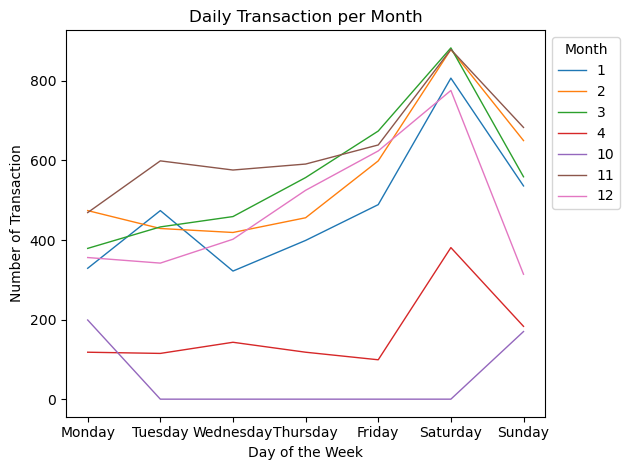

In [170]:
#12
daily_transactions_count_pivot = daily_transactions_count.pivot(index='day_name', columns='month', values='Transaction_Count')
daily_transactions_count_pivot = daily_transactions_count_pivot.fillna(0)

# Plotting the comparison as a line chart
plt.figure(figsize=(15, 20))
daily_transactions_count_pivot.plot(kind='line', linewidth=1)

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transaction')
plt.title('Daily Transaction per Month')

plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

saturday is the peak day for the sales.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [171]:
# 14
unique_periods = df['period_day'].unique()

# Display the unique values
print("Unique values in 'period_day':", unique_periods)

Unique values in 'period_day': ['morning' 'afternoon' 'evening' 'night']


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [172]:
# 15
unique_hours_by_period = df.groupby('period_day')['hour'].unique()

# Display the result
for period, hours in unique_hours_by_period.items():
    print(f"Unique {period}_hour: {hours}")


Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique morning_hour: [ 9 10 11  8  7  1]
Unique night_hour: [21 23 22]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Morning typically starts around 6 or 7 AM and goes until about 12 PM (noon), but "1" is the hour for 1:00 AM, which is considered nighttime, not morning.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

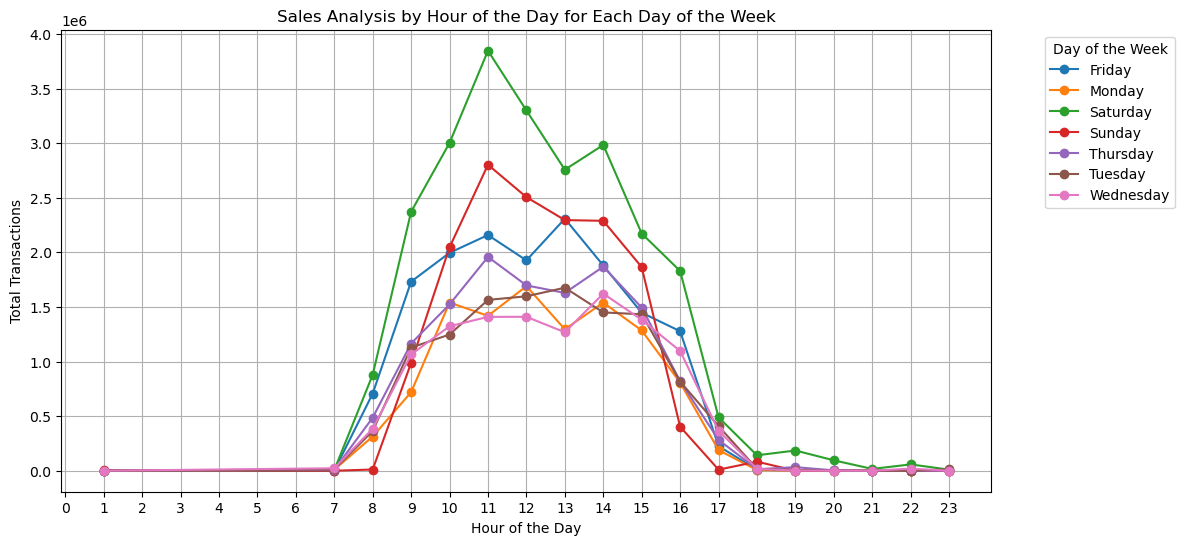

In [173]:
hourly_sales_day = df.groupby(['day_name', 'hour'])['Transaction'].sum().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
for day in hourly_sales_day.index:
    plt.plot(hourly_sales_day.columns, hourly_sales_day.loc[day], marker='o', label=day)

# Adding titles and labels
plt.title('Sales Analysis by Hour of the Day for Each Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Transactions')
plt.xticks(range(24))  # To show each hour from 0 to 23 on the x-axis
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the chart
plt.show()


18. The daily sales trend plot reveals that _______

usually customers make peak transaction during the afternoon or 11pm

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

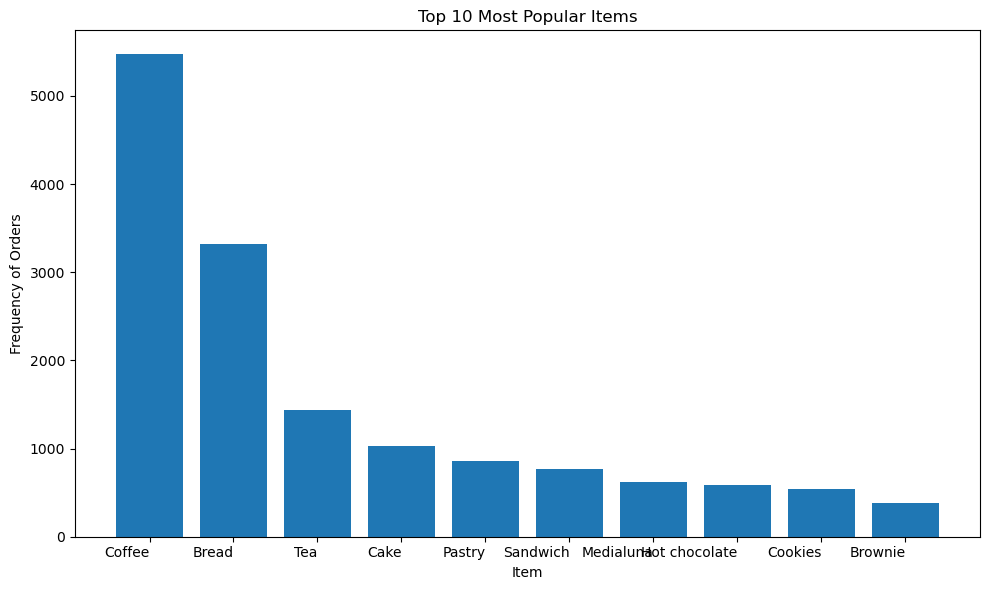

In [174]:
# 19
# Count the frequency of each item
item_popularity = df['Item'].value_counts().reset_index()
item_popularity.columns = ['Item', 'Frequency']

item_popularity = item_popularity.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(item_popularity['Item'][:10], item_popularity['Frequency'][:10])
plt.xlabel('Item')
plt.ylabel('Frequency of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks(ha='right')
plt.tight_layout()
plt.show()


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

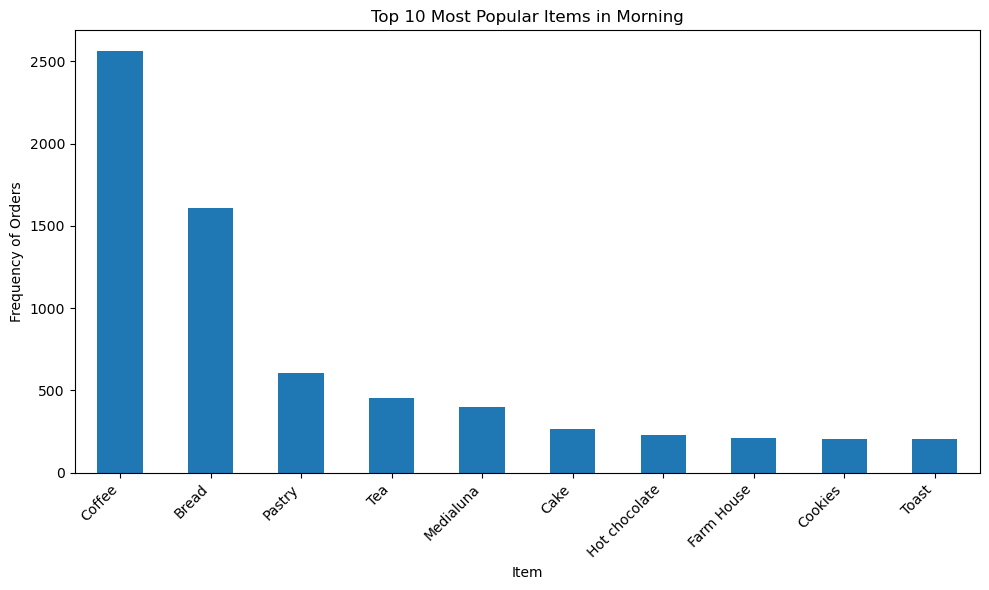

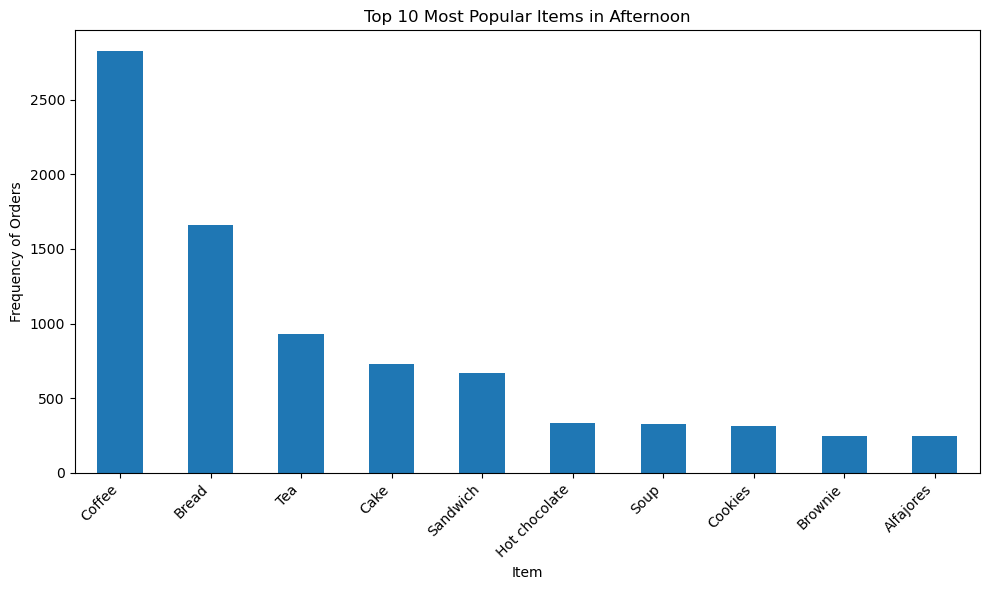

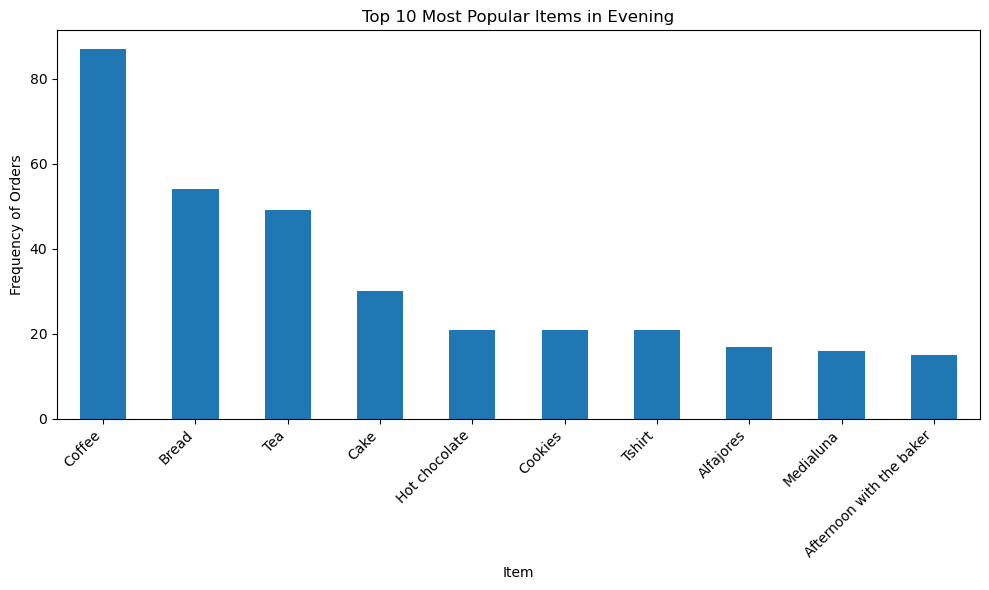

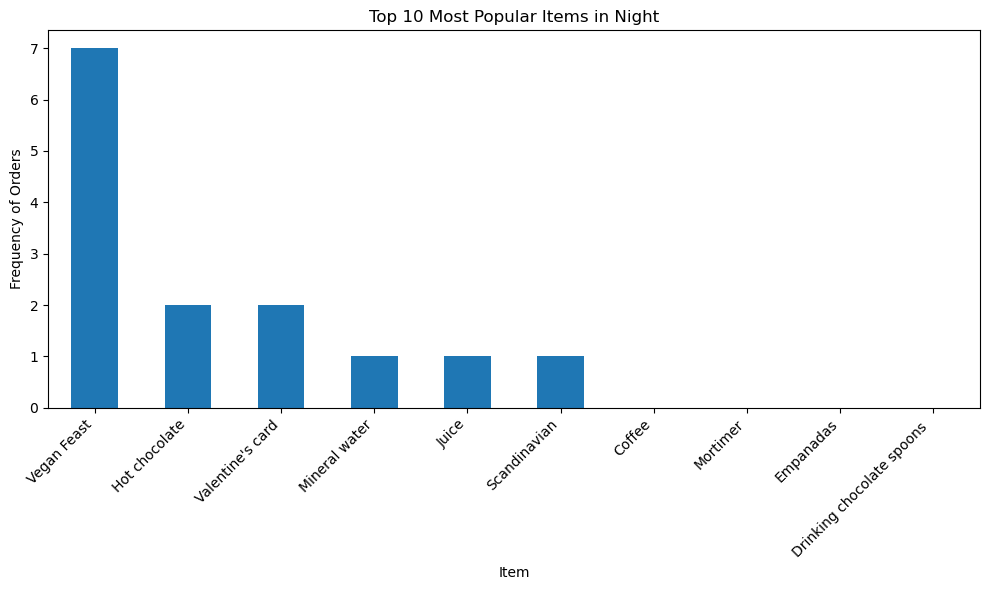

In [175]:
# Group the data by 'period_day' and 'Item', then count the frequency
item_popularity_by_period = df.groupby(['period_day', 'Item']).size().reset_index(name='Frequency')

# Pivot the table to have periods as columns
pivot_item_popularity = item_popularity_by_period.pivot(index='Item', columns='period_day', values='Frequency').fillna(0)

# Sort the items by frequency within each period
pivot_item_popularity = pivot_item_popularity.sort_values(by=periods, ascending=False)

# Create separate plots for each period
periods = ['morning', 'afternoon', 'evening', 'night']

for period in periods:
    # Sort the items for the current period
    sorted_items = pivot_item_popularity[period].sort_values(ascending=False).head(10)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sorted_items.plot(kind='bar')
    plt.xlabel('Item')
    plt.ylabel('Frequency of Orders')
    plt.title(f'Top 10 Most Popular Items in {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


21. It turns out that there is something different in the plot above, the insight is ____


the most popular items varies depending on the time of the day.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

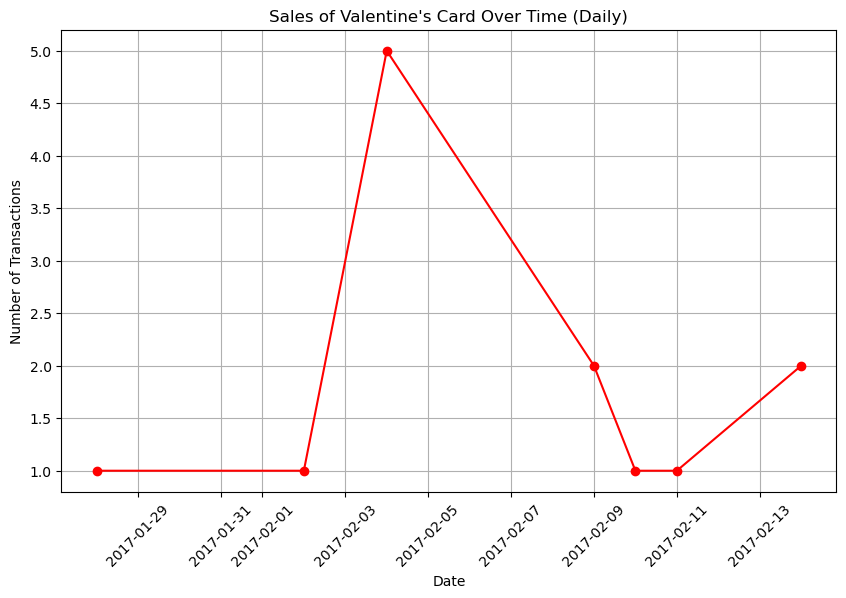

In [176]:
#22 
# Filter data for Valentine's card
valentine_card_sales = df[df['Item'] == "Valentine's card"]

sales_by_day = valentine_card_sales.groupby('date')['Transaction'].count()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_by_day.index, sales_by_day.values, marker='o', color='red')
plt.title("Sales of Valentine's Card Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



23. I found the insight from the sale of the Valentine's cards above is ____


mostly sold during february or the valentine's month

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [180]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming df is your original dataset
# Step 1: Create a binary matrix using pivot_table
df_pivot = df.pivot_table(index='Transaction', columns='Item', aggfunc='size', fill_value=0)

# Step 2: Convert all values greater than 1 to 1 (binary format)
df_pivot[df_pivot > 1] = 1

# Step 3: View the transformed dataset (binary matrix)
print(df_pivot.head())

# # Step 4: Apply the Apriori algorithm
# frequent_itemsets = apriori(df_pivot, min_support=0.5, use_colnames=True)

# # Step 5: Generate the association rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)




Item         Adjustment  Afternoon with the baker  Alfajores  Argentina Night  \
Transaction                                                                     
1                     0                         0          0                0   
2                     0                         0          0                0   
3                     0                         0          0                0   
4                     0                         0          0                0   
5                     0                         0          0                0   

Item         Art Tray  Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  \
Transaction                                                             ...   
1                   0      0         0         0             0       0  ...   
2                   0      0         0         0             0       0  ...   
3                   0      0         0         0             0       0  ...   
4                   0      0         

In [ ]:
# 25
# Step 1: Pivot the data to create a binary matrix where each row is a transaction
# and each column represents an item, using 1 for presence and 0 for absence
df_pivot = df.pivot_table(index='Transaction', columns='Item', aggfunc='size', fill_value=0)

# Step 2: Convert all values greater than 1 to 1 (binary format)
df_pivot[df_pivot > 1] = 1

# Display the first few rows of the transformed dataframe
df_pivot.head()


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [189]:
# Step 1: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_pivot, min_support=0.02, use_colnames=True)

# Display the frequent itemsets with support
frequent_itemsets.head(35)



c:\Users\yulia\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [187]:
# 27
# Step 1: Apply the Apriori algorithm with min_support=0.02
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_pivot, min_support=0.02, use_colnames=True)

# Step 2: Generate association rules based on the lift metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 3: Display the first few rules
rules.head()

c:\Users\yulia\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



The use of the Apriori algorithm has effectively revealed frequent itemsets within the transaction data. Here are the main findings:

1. Popular Individual Items:

Certain items like Bread, Coffee, and Cake show up regularly in transactions with significant support values (e.g., Bread, with a support of 0.327). This indicates that these products are highly favored and are frequently purchased on their own by customers.

2. Frequent Item Pairings:

The algorithm also identified common item pairs, such as Cake and Bread (support of 0.023349) and Coffee and Tea (support of 0.049868). These combinations suggest that when customers buy one of these items, they are likely to purchase the other, indicating that these items complement each other and could be marketed together.

3. Support Threshold:

The itemsets discovered have support values exceeding the 0.02 threshold, meaning they appear in at least 2% of all transactions. This demonstrates that these products (either individually or in combination) are not only popular but also represent a substantial share of total transactions.

4. Business Insights:

The findings can guide marketing and inventory strategies. For example:
Items like Coffee and Pastry (support of 0.047544) could be promoted together as a pair, given their frequent co-occurrence.
High-support items like Bread, Cake, and Coffee should be prioritized for stocking or special offers.

5. Future Directions:

Further analysis can be done by exploring association rules with additional metrics like lift or by adjusting the min_support threshold to uncover more rare but significant combinations. This could yield even deeper insights into consumer preferences and behavior.
Overall, the frequent itemset analysis provides useful insights into which individual items and item pairs are commonly bought together, offering valuable information for targeted marketing campaigns and more efficient inventory management.